<a href="https://colab.research.google.com/github/xrolly28/Data-Science-Project/blob/main/Decision%20Tree/DS_g4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/financial_transaction_tree_task.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.shape
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.loc[df['isFraud']==1].type.drop_duplicates().values

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [ ]:
df1=df.drop(['nameOrig','nameDest'],axis=1)
df1.head()
# df1.shape

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df_numeric=df1.drop(['type'],axis=1)
df_categorical_encoded = pd.get_dummies(df1['type'], drop_first=True)
df_categorical_encoded.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [ ]:
df1=pd.concat([df_numeric,df_categorical_encoded],axis=1)
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [ ]:
df2=df1.drop(['isFraud'],axis=1)
df2['isfraud']=df1['isFraud']
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isfraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0


In [ ]:
df2.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isfraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,-0.013746,-0.005992,0.017102,0.004375,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.071255,-0.047878,-0.397464,0.539278,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,-0.204549,-0.022109,-0.186253,-0.081976,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.214548,-0.022489,-0.190113,-0.087814,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,0.130120,0.010704,-0.303959,0.130362,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,0.160136,0.007813,-0.329066,0.197706,-0.000495
CASH_OUT,-0.013746,0.071255,-0.204549,-0.214548,0.130120,0.160136,1.000000,-0.061772,-0.531032,-0.223456,0.010328
DEBIT,-0.005992,-0.047878,-0.022109,-0.022489,0.010704,0.007813,-0.061772,1.000000,-0.059254,-0.024934,-0.002741
PAYMENT,0.017102,-0.397464,-0.186253,-0.190113,-0.303959,-0.329066,-0.531032,-0.059254,1.000000,-0.214348,-0.023566
TRANSFER,0.004375,0.539278,-0.081976,-0.087814,0.130362,0.197706,-0.223456,-0.024934,-0.214348,1.000000,0.049279


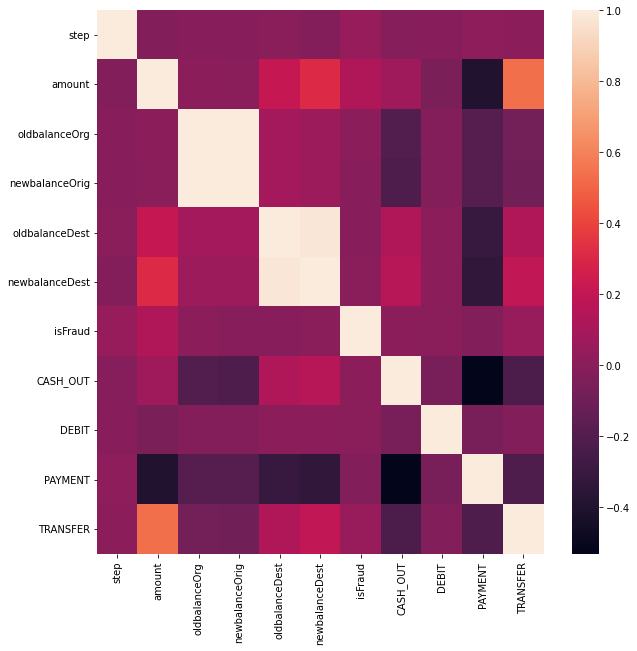

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr())

In [ ]:
x=df2.iloc[:,0:10]
y=df2.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.99975204483538

In [ ]:
#gradient boosting
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9997456870106461

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
# from sklearn import XGBClassifier
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred= my_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9997361502735455

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[314211      1]
 [    82    279]]


In [ ]:
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [ ]:
print(accuracy)

0.9965699535560903
